In [21]:
import numpy as np
import matplotlib.pyplot as plt

from guidance_utils import full_grid, geom_analysis, optimal_weights
from toy_math import ToyModel

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# Triangle
data = np.array([[0, 0], [2, 0], [1, 1.73205]])
data -= np.array([1, 0.57735])
data *= 0.75
labels = np.array([1,2,3])

# Gaussian cloud
mu, var, n = np.array([0,0]), 1, 6
cov = np.diag(np.array([var, var])**2)
data = np.random.multivariate_normal(np.array(mu), cov, n)
labels = [1,1,2,2,3,3]

In [ ]:
# Setup 
dim = data.shape[1]
num_steps, sigma_min, sigma_max, rho = 40, 2e-3, 80, 7

# Guidance

In [40]:
# Triangle
data = np.array([[0, 0], [2, 0], [1, 1.73205]])
data -= np.array([1, 0.57735])
data *= 0.75

data_labels = [0,1,2]  # One label per data point

# # Gaussian cloud
# mu, var, n = np.array([0,0]), 1, 10
# cov = np.diag(np.array([var, var])**2)
# data = np.random.multivariate_normal(np.array(mu), cov, n)

# Setup 
dim = data.shape[1]
num_steps, sigma_min, sigma_max, rho = 40, 2e-3, 80, 7
t_steps = t_schedule(num_steps, sigma_min, sigma_max, rho)

## Full analysis

Set the network endpoint errors `'delta'` for both networks and enable conditioning for the positive model via `'cond'` to simulate CFG. This will assign each data point its own class label. 

100%|██████████| 40/40 [00:00<00:00, 3209.72it/s]


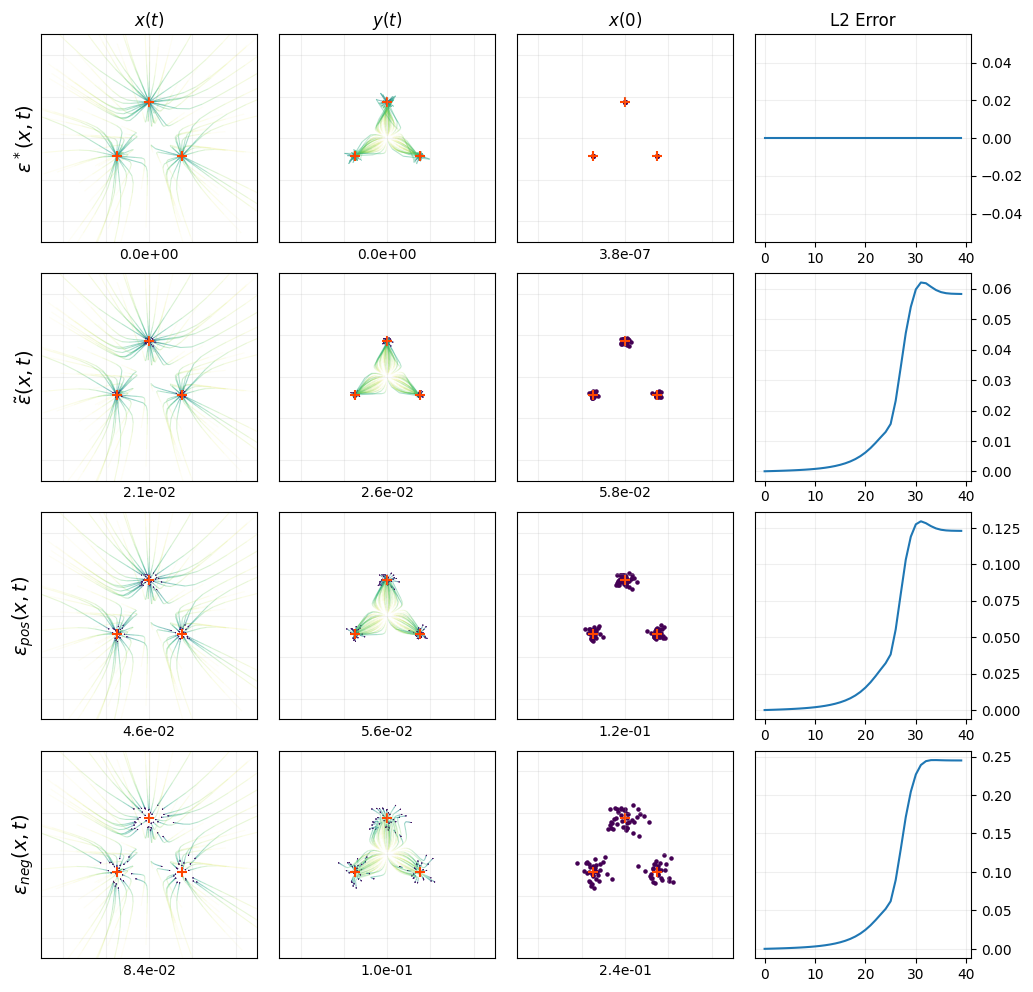

In [54]:
model = ToyModel(data=data, 
                 data_labels=data_labels, 
                 num_steps=num_steps, 
                 sigma_min=sigma_min, 
                 sigma_max=sigma_max, 
                 rho=rho, 
                 init='random',
                 pos_kwargs={'delta': 1e-1, 'cond': False},  # positive network 
                 neg_kwargs={'delta': 2e-1, 'cond': False},  # negative network
                 heun=False)

out = full_grid(model=model, 
                x_labels=None,                   # Labels for trajectories 
                n=100,                             # number of trajectories
                m=100,                             # how many to plot
                guid_weight=1,                               # guidance weight, float or 'opt_weight'
                interval=list(range(num_steps)),          # guidance interval
                save_as=None)

# out = full_grid(data, 
#                 100,                             # number of trajectories
#                 100,                             # how many to plot
#                 t_steps,                         # list of noise levels
#                 1,                               # guidance weight, float or 'opt_weight'
#                 list(range(num_steps)),          # guidance interval
#                 {'delta': 1e-1, 'cond': False},  # positive network 
#                 {'delta': 2e-1, 'cond': False},  # negative network
#                 init='random')                   # initialization mode

## Geometric analysis

Zoomed in on a single trajectory. Set up for the triangle data. If you change the data or choose different initializations for the trajectory, adjust the `xlim` and `ylim` of the plots.

100%|██████████| 3/3 [00:00<00:00, 44.10it/s]

Opt weight = 0.59


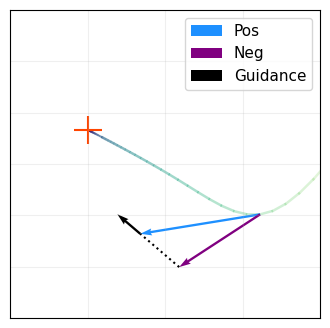

In [29]:
num_steps, sigma_min, sigma_max, rho = 120, 2e-3, 80, 7
t_steps = t_schedule(num_steps, sigma_min, sigma_max, rho)

plt.figure(figsize=(4,4))

pos_kwargs = {'delta': 2e-1, 'cond': False}  # positive network
neg_kwargs = {'delta': 4e-1, 'cond': False}  # negative network

geom_analysis(data, 
              t_steps,                 # list of noise levels
              [np.array([50,60])]*3,   # Trajectory initialization points
              list(range(num_steps)),  # guidance interval
              'opt_weight',            # guidance weight, float or 'opt_weight'
              [78],                    # At what step to draw the prediction arrows
              pos_kwargs,              # positive network 
              neg_kwargs,              # negative network 
              True)                    # legend

plt.xlim([-0.2, 0.6])
plt.ylim([0.5, 1.1])
plt.grid(alpha=0.2)
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False)

del pos_kwargs, neg_kwargs

100%|██████████| 3/3 [00:00<00:00, 68.27it/s]

Opt weight = 1.40


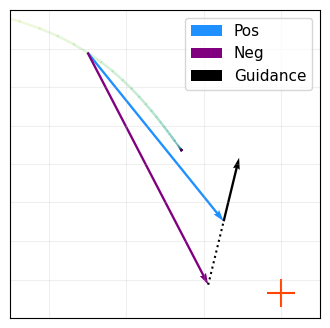

In [31]:
num_steps, sigma_min, sigma_max, rho = 120, 2e-3, 80, 7
t_steps = t_schedule(num_steps, sigma_min, sigma_max, rho)

plt.figure(figsize=(4,4))
pos_kwargs = {'delta': 5e-1, 'cond': True}  # positive network
neg_kwargs = {'delta': 5e-1, 'cond': False}  # negative network

geom_analysis(data, 
              t_steps,                 # list of noise levels
              [np.array([-50,0])]*3,   # Trajectory initialization points
              list(range(num_steps)),  # guidance interval
              1,                       # guidance weight, float or 'opt_weight'
              [74],                    # At what step to draw the prediction arrows
              pos_kwargs,              # positive network 
              neg_kwargs,              # negative network 
              True)                    # legend

plt.xlim([-0.7, 0.1])
plt.ylim([0.8, 1.6])
plt.grid(alpha=0.2)
plt.tick_params(left = False, right = False , labelleft = False, 
                labelbottom = False, bottom = False)

del pos_kwargs, neg_kwargs

## Optimal Weight

Compute and plot the average step-wise optimal weight for 100 trajectories, for different $\delta_{\text{neg}}$.

In [8]:
def opt_weight_setup():
    xticks = list(range(0, 45, 5))
    xlabels = xticks.copy()
    xlabels[-1] = "$n_{{steps}}$"
    plt.xticks(xticks, xlabels)
    
    plt.legend()
    plt.yscale('log')
    plt.ylim([1e-4, 1e4])

100%|██████████| 100/100 [00:00<00:00, 197.84it/s]


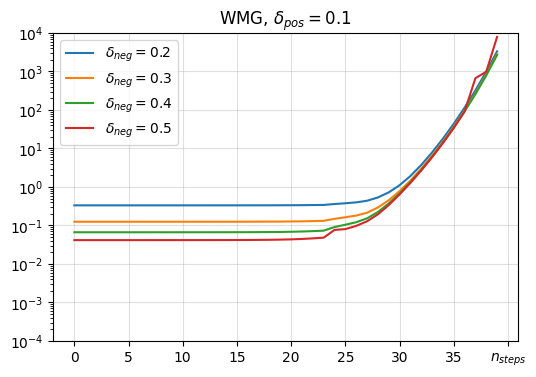

100%|██████████| 100/100 [00:00<00:00, 377.54it/s]


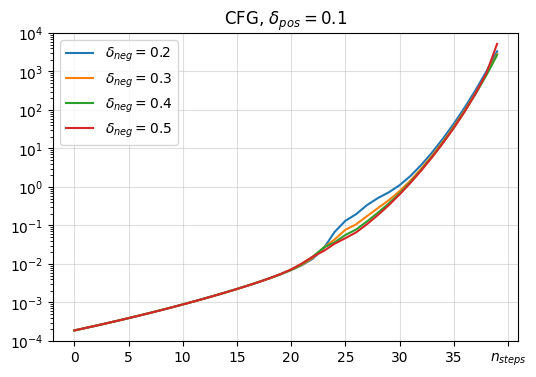

In [11]:
num_steps, sigma_min, sigma_max, rho = 40, 2e-3, 80, 7
t_steps = t_schedule(num_steps, sigma_min, sigma_max, rho)

eps_pos = 1e-1

plt.figure(figsize=(6,4))
plt.title(f'WMG, $\\delta_{{pos}} = {eps_pos}$')
plt.grid(alpha=0.4)
for eps_neg in [2e-1, 3e-1, 4e-1, 5e-1]:
    optimal_weights(data, 
                    100, 
                    t_steps, 
                    'opt_weight', 
                    list(range(num_steps)), 
                    {'delta': eps_pos, 'cond': False},  # positive network 
                    {'delta': eps_neg, 'cond': False},  # negative network
                    init='random')
opt_weight_setup()
plt.savefig(f"/home/tikai103/plots/inductive_bias_diffusion/figs/toy_opt_weight-wmg.png", dpi=150, bbox_inches='tight')
plt.show()

plt.figure(figsize=(6,4))
plt.title(f'CFG, $\\delta_{{pos}} = {eps_pos}$')
plt.grid(alpha=0.4)
for eps_neg in [2e-1, 3e-1, 4e-1, 5e-1]:
    optimal_weights(data, 
                    100, 
                    t_steps, 
                    'opt_weight', 
                    list(range(num_steps)), 
                    {'delta': eps_pos, 'cond': True},  # positive network 
                    {'delta': eps_neg, 'cond': False},  # negative network
                    init='random')
opt_weight_setup()
plt.savefig(f"/home/tikai103/plots/inductive_bias_diffusion/figs/toy_opt_weight-cfg.png", dpi=150, bbox_inches='tight')
plt.show()